In [ ]:
!pip install giotto-tda
!pip install gudhi
!pip install umap-learn
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.6/554.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 45.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
from gudhi.point_cloud.timedelay import TimeDelayEmbedding

In [ ]:
#### On crée 2 dataset de tailles (nbre_serie_temp,temps)

gaussian1 = np.random.normal(loc = 0, scale = 1, size = (200,100))
gaussian2 = np.random.normal(loc = 0, scale = 2, size = (200,100))

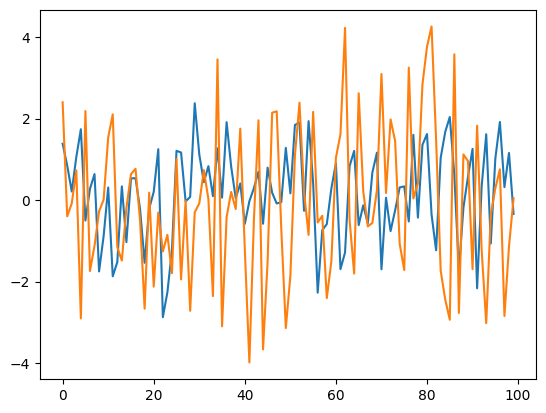

In [ ]:
plt.plot(gaussian1[0])
plt.plot(gaussian2[0])
plt.show()

Time Delay Embedding transforme votre série temporelle en un nuage de point en "dim" dimensions, donc chaque point est donné par $(X_t,X_{t-\textrm{delay}})$

In [ ]:
TD = TimeDelayEmbedding(dim = 2, delay = 1, skip = 1)

TD1 = np.array(TD.transform(gaussian1))
TD2 = np.array(TD.transform(gaussian2))

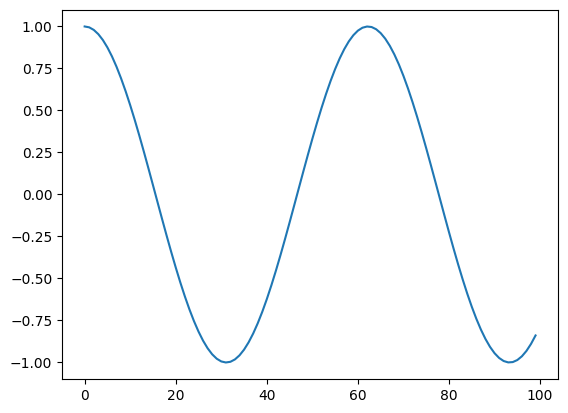

In [ ]:
############# Illustration plus parlante ##########
TS = np.cos(np.linspace(0,10,100))
plt.plot(TS)
plt.show()

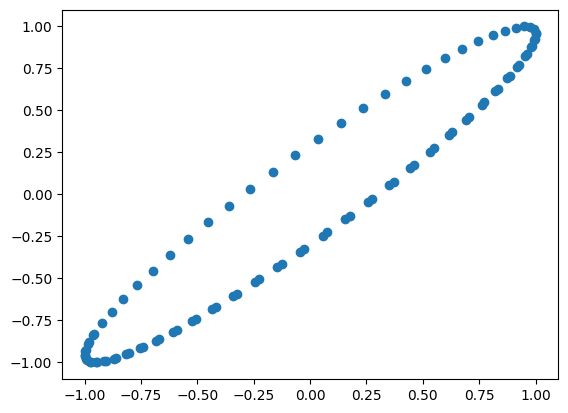

In [ ]:
TD = TimeDelayEmbedding(dim = 2, delay = 3, skip = 1)
TD_cos = TD.transform([TS])
plt.scatter(TD_cos[0][:,0],TD_cos[0][:,1])

Pour chaque nuage de point (correpondant chacun à une série temporelle) on crée le complexe de Rips et sa persistence de dimension 1

In [ ]:
from tqdm import tqdm
dgms1 = []

for pc in tqdm(TD1):
    rips = gudhi.RipsComplex(points=pc).create_simplex_tree(max_dimension=2)
    rips.compute_persistence()
    dgms1.append(rips.persistence_intervals_in_dimension(1))

100%|██████████| 200/200 [00:18<00:00, 10.54it/s]


In [ ]:
from tqdm import tqdm
dgms2 = []

for pc in tqdm(TD2):
    rips = gudhi.RipsComplex(points=pc).create_simplex_tree(max_dimension=2)
    rips.compute_persistence()
    dgms2.append(rips.persistence_intervals_in_dimension(1))

100%|██████████| 200/200 [00:17<00:00, 11.18it/s]


In [ ]:
from gudhi import bottleneck_distance
from gudhi.wasserstein import wasserstein_distance

On va calculer les distances entre chaque diagramme de persistance de séries temporelles.

In [ ]:
dgms = dgms1 + dgms2
label = [1]*len(dgms1) + [2]*len(dgms2)


B = np.zeros((len(dgms),len(dgms)))

for i in range(len(dgms)):
    for j in range(i):
        B[i,j] = bottleneck_distance(dgms[i],dgms[j])
        print((i,j))

B += B.Tb

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(387, 109)
(387, 110)
(387, 111)
(387, 112)
(387, 113)
(387, 114)
(387, 115)
(387, 116)
(387, 117)
(387, 118)
(387, 119)
(387, 120)
(387, 121)
(387, 122)
(387, 123)
(387, 124)
(387, 125)
(387, 126)
(387, 127)
(387, 128)
(387, 129)
(387, 130)
(387, 131)
(387, 132)
(387, 133)
(387, 134)
(387, 135)
(387, 136)
(387, 137)
(387, 138)
(387, 139)
(387, 140)
(387, 141)
(387, 142)
(387, 143)
(387, 144)
(387, 145)
(387, 146)
(387, 147)
(387, 148)
(387, 149)
(387, 150)
(387, 151)
(387, 152)
(387, 153)
(387, 154)
(387, 155)
(387, 156)
(387, 157)
(387, 158)
(387, 159)
(387, 160)
(387, 161)
(387, 162)
(387, 163)
(387, 164)
(387, 165)
(387, 166)
(387, 167)
(387, 168)
(387, 169)
(387, 170)
(387, 171)
(387, 172)
(387, 173)
(387, 174)
(387, 175)
(387, 176)
(387, 177)
(387, 178)
(387, 179)
(387, 180)
(387, 181)
(387, 182)
(387, 183)
(387, 184)
(387, 185)
(387, 186)
(387, 187)
(387, 188)
(387, 189)
(387, 190)
(387, 191)
(387, 192

In [ ]:
from umap import UMAP
mapper_umap_bn = UMAP(metric='precomputed',init='random').fit(B)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


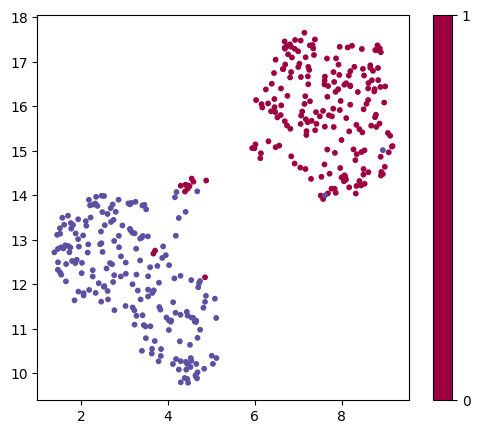

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(*mapper_umap_bn.embedding_.T, s=10, c = label, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(2))
cbar.set_ticks(np.arange(2))

On va vectorialiser le problème en passant par les fonctions landscape.

In [ ]:
from gudhi.representations import Landscape

LS = Landscape()
LS_train = LS.fit_transform(dgms)

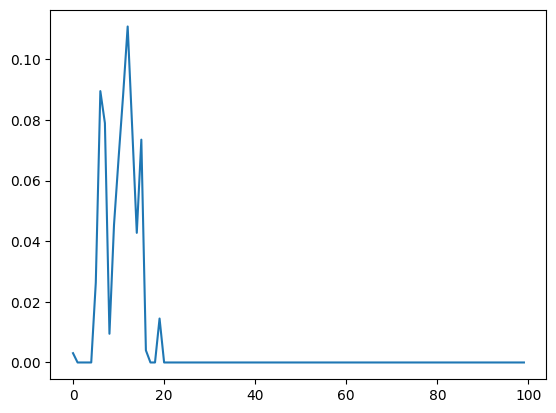

In [ ]:
plt.plot(LS_train[0][:100])

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(LS_train, label)

clf.score(LS_train, label)

0.9925